In [1]:
import  pymysql
db= pymysql.connect(host='localhost', user='root', password='root', db='mall')
curs =db.cursor(pymysql.cursors.DictCursor)
query = "SELECT delivery_day, delivery_time, count(*) FROM orders" +\
" GROUP BY delivery_day, delivery_time ORDER BY count(*) DESC;"
curs.execute(query)
rows= curs.fetchall()
for row in rows:
    print(row['delivery_day'], row['delivery_time'], row['count(*)'])
db.close

6 11:00:00 101
3 23:59:00 101
4 11:00:00 101
4 17:00:00 99
6 17:00:00 99
1 11:00:00 99
5 14:00:00 98
6 23:59:00 95
5 10:00:00 93
1 14:00:00 93
3 10:00:00 91
2 10:00:00 91
4 23:59:00 91
2 11:00:00 90
1 23:59:00 90
6 18:00:00 89
2 14:00:00 89
1 18:00:00 88
2 18:00:00 88
6 14:00:00 87
3 14:00:00 86
6 10:00:00 85
4 18:00:00 84
5 18:00:00 83
5 17:00:00 83
3 11:00:00 82
4 10:00:00 82
5 11:00:00 80
2 23:59:00 79
1 17:00:00 79
3 18:00:00 79
5 23:59:00 77
3 17:00:00 76
4 14:00:00 75
2 17:00:00 71
1 10:00:00 62


<bound method Connection.close of <pymysql.connections.Connection object at 0x00000278049BE4C0>>

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.DataFrame(rows)
df

,delivery_day,delivery_time,count(*)
0,6,0 days 11:00:00,101
1,3,0 days 23:59:00,101
2,4,0 days 11:00:00,101
3,4,0 days 17:00:00,99
4,6,0 days 17:00:00,99
5,1,0 days 11:00:00,99
6,5,0 days 14:00:00,98
7,6,0 days 23:59:00,95
8,5,0 days 10:00:00,93
9,1,0 days 14:00:00,93


In [7]:
df['delivery_day'] = df['delivery_day'].map({1:'Monday',
                                            2:"Tuseday",
                                            3:"Wednesday",
                                            4:"Thursday",
                                            5:"Friday",
                                            6:"Saturday"})



In [8]:
df["delivery_time"]=df["delivery_time"].dt.components.hours
df

,delivery_day,delivery_time,count(*)
0,Saturday,11,101
1,Wednesday,23,101
2,Thursday,11,101
3,Thursday,17,99
4,Saturday,17,99
5,Monday,11,99
6,Friday,14,98
7,Saturday,23,95
8,Friday,10,93
9,Monday,14,93


In [9]:
#df['delivery_time']= df['delivery_time'].dt.hour
df['delivery_time']= df['delivery_time'].map({10: "10:00 - 13:00",
                                             11: "11:00 - 14:00",
                                             14: "14:00 - 17:00",
                                             17: "17:00 - 20:00",
                                             18: "18:00 - 21:00",
                                             23: "Anytime"})
df

,delivery_day,delivery_time,count(*)
0,Saturday,11:00 - 14:00,101
1,Wednesday,Anytime,101
2,Thursday,11:00 - 14:00,101
3,Thursday,17:00 - 20:00,99
4,Saturday,17:00 - 20:00,99
5,Monday,11:00 - 14:00,99
6,Friday,14:00 - 17:00,98
7,Saturday,Anytime,95
8,Friday,10:00 - 13:00,93
9,Monday,14:00 - 17:00,93


In [10]:
df= df.pivot('delivery_time', "delivery_day", "count(*)")
df

delivery_day,Friday,Monday,Saturday,Thursday,Tuseday,Wednesday
delivery_time,,,,,,
10:00 - 13:00,93,62,85,82,91,91
11:00 - 14:00,80,99,101,101,90,82
14:00 - 17:00,98,93,87,75,89,86
17:00 - 20:00,83,79,99,99,71,76
18:00 - 21:00,83,88,89,84,88,79
Anytime,77,90,95,91,79,101


In [11]:
df=df[['Monday','Tuseday','Wednesday','Thursday','Friday','Saturday']]
df

delivery_day,Monday,Tuseday,Wednesday,Thursday,Friday,Saturday
delivery_time,,,,,,
10:00 - 13:00,62,91,91,82,93,85
11:00 - 14:00,99,90,82,101,80,101
14:00 - 17:00,93,89,86,75,98,87
17:00 - 20:00,79,71,76,99,83,99
18:00 - 21:00,88,88,79,84,83,89
Anytime,90,79,101,91,77,95


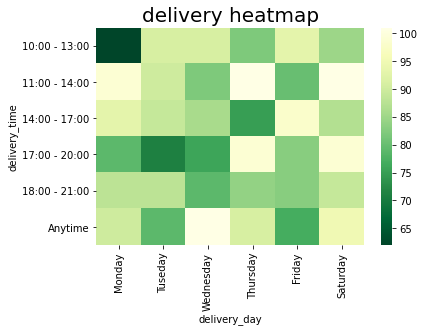

In [12]:
sns.heatmap(df, cmap='YlGn_r')
plt.title("delivery heatmap", fontsize=20)
plt.show()

# Heat map Cmap

'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'


In [13]:
df.style.background_gradient(cmap="YlGn_r")

delivery_day,Monday,Tuseday,Wednesday,Thursday,Friday,Saturday
delivery_time,,,,,,
10:00 - 13:00,62,91,91,82,93,85
11:00 - 14:00,99,90,82,101,80,101
14:00 - 17:00,93,89,86,75,98,87
17:00 - 20:00,79,71,76,99,83,99
18:00 - 21:00,88,88,79,84,83,89
Anytime,90,79,101,91,77,95


# Product Analysis

In [14]:
import  pymysql
db= pymysql.connect(host='localhost', user='root', password='root', db='mall')
curs =db.cursor(pymysql.cursors.DictCursor)
query = "SELECT products_id, sum(products_quantity) FROM carts" +\
" GROUP BY products_id ORDER BY sum(products_quantity) DESC;"
curs.execute(query)
rows= curs.fetchall()
for row in rows:
    print(row['products_id'], row['sum(products_quantity)'])
db.close

1580 48
1449 44
1573 44
1481 40
1484 40
1514 40
1678 40
1545 39
1635 39
1642 39
1673 39
1446 38
1506 38
1518 38
1569 38
1590 38
1630 38
1654 38
1707 38
1486 37
1716 37
1726 37
1450 36
1483 36
1497 36
1652 36
1692 36
1478 35
1596 35
1605 35
1653 35
1466 34
1578 34
1675 34
1696 34
1439 33
1469 33
1474 33
1509 33
1550 33
1608 33
1660 33
1701 33
1710 33
1456 32
1472 32
1496 32
1523 32
1557 32
1616 32
1663 32
1699 32
1459 31
1465 31
1527 31
1571 31
1620 31
1700 31
1712 31
466 30
1432 30
1436 30
1454 30
1473 30
1495 30
1540 30
1587 30
1599 30
1615 30
1629 30
1651 30
1671 30
1683 30
1697 30
1720 30
1468 29
1498 29
1538 29
1564 29
1619 29
1668 29
1679 29
1682 29
1445 28
1470 28
1480 28
1490 28
1526 28
1532 28
1537 28
1579 28
1584 28
1597 28
1606 28
1627 28
1640 28
1713 28
1728 28
1433 27
1447 27
1452 27
1467 27
1614 27
1636 27
1643 27
1680 27
1681 27
1693 27
1441 26
1458 26
1464 26
1513 26
1617 26
1628 26
1655 26
1688 26
1698 26
1721 26
1723 26
1730 26
461 25
747 25
1612 25
1658 25
1672 25
167

2352 9
2355 9
2371 9
2388 9
2418 9
2422 9
2471 9
2474 9
2530 9
2545 9
2558 9
2654 9
2694 9
2702 9
2709 9
2721 9
2747 9
2757 9
2784 9
2813 9
2821 9
2841 9
2844 9
2847 9
2879 9
2888 9
2914 9
2931 9
2938 9
2947 9
2966 9
2970 9
2985 9
3034 9
3037 9
3044 9
3047 9
3050 9
3059 9
3073 9
3080 9
3085 9
3117 9
3137 9
3185 9
3191 9
3211 9
3219 9
3232 9
3254 9
3274 9
3287 9
3296 9
3305 9
3361 9
3372 9
3471 9
3495 9
3503 9
3512 9
3521 9
3537 9
3552 9
3583 9
3605 9
3618 9
3669 9
3687 9
3711 9
3738 9
3740 9
3754 9
3758 9
3765 9
3783 9
3803 9
3822 9
3830 9
3838 9
3843 9
3844 9
3871 9
3893 9
3903 9
3976 9
4028 9
4037 9
4054 9
4068 9
4084 9
4106 9
4113 9
4114 9
10 8
24 8
25 8
28 8
41 8
49 8
65 8
87 8
103 8
112 8
119 8
131 8
142 8
166 8
179 8
204 8
229 8
270 8
274 8
278 8
301 8
335 8
357 8
361 8
403 8
408 8
438 8
439 8
465 8
494 8
514 8
548 8
549 8
551 8
595 8
612 8
617 8
678 8
681 8
694 8
705 8
715 8
754 8
789 8
796 8
810 8
832 8
837 8
862 8
863 8
871 8
888 8
893 8
919 8
932 8
948 8
977 8
988 8
990 8
101

2377 4
2379 4
2393 4
2398 4
2405 4
2410 4
2416 4
2419 4
2431 4
2443 4
2452 4
2455 4
2460 4
2466 4
2477 4
2484 4
2488 4
2491 4
2520 4
2521 4
2547 4
2557 4
2599 4
2604 4
2608 4
2617 4
2620 4
2624 4
2625 4
2640 4
2651 4
2657 4
2671 4
2683 4
2688 4
2696 4
2699 4
2701 4
2728 4
2733 4
2736 4
2764 4
2767 4
2788 4
2794 4
2818 4
2832 4
2840 4
2849 4
2858 4
2884 4
2885 4
2901 4
2908 4
2911 4
2916 4
2926 4
2929 4
2941 4
2946 4
2950 4
2953 4
2969 4
2992 4
2994 4
2998 4
3008 4
3009 4
3036 4
3042 4
3055 4
3065 4
3089 4
3105 4
3108 4
3113 4
3116 4
3129 4
3136 4
3163 4
3172 4
3181 4
3182 4
3196 4
3203 4
3225 4
3234 4
3242 4
3245 4
3253 4
3269 4
3289 4
3291 4
3302 4
3317 4
3318 4
3322 4
3332 4
3335 4
3349 4
3353 4
3368 4
3384 4
3387 4
3418 4
3443 4
3453 4
3456 4
3501 4
3511 4
3516 4
3528 4
3532 4
3539 4
3568 4
3600 4
3627 4
3634 4
3636 4
3642 4
3653 4
3654 4
3673 4
3676 4
3686 4
3699 4
3703 4
3712 4
3715 4
3717 4
3725 4
3731 4
3733 4
3736 4
3741 4
3752 4
3763 4
3780 4
3784 4
3796 4
3804 4
3807 4
3809 4

<bound method Connection.close of <pymysql.connections.Connection object at 0x000002780A4EA550>>

In [15]:
import  pymysql
db= pymysql.connect(host='localhost', user='root', password='root', db='mall')
curs =db.cursor(pymysql.cursors.DictCursor)
query = "SELECT carts.products_id, products.name, sum(carts.products_quantity)" +\
" FROM carts INNER JOIN products ON carts.products_id = products.id" +\
" GROUP BY products_id ORDER BY sum(products_quantity) DESC;"
curs.execute(query)
rows= curs.fetchall()
for row in rows:
    print(row['products_id'],row['name'], row['sum(carts.products_quantity)'])
db.close

1580 어메이징 와규소불고기전골 48
1449 [풀무원] 우리쌀 떡국 700g(4~5인분) 44
1573 처음 먹는 어린이 김 오리지널 1BOX (10봉) 44
1481 [오뗄] 부대찌개모듬햄500g 40
1484 [새아침]신 임꺽정 납작떡갈비 1,000g 40
1514 하림 아이로운 닭가슴살 팝콘치킨 500g 40
1678 맵고 시원한 부대찌개 (직화용기) 480g 40
1545  오래오래맛있는총각김치 1.5kg 39
1635 비비고 김치볶음 80g 39
1642 스테이크 샐러드 39
1673 비비고 베이컨 김치볶음 70g*5 39
1446 [CJ] 비비고한섬만두384g x 2 38
1506 [피코크] 모듬 전 470g 38
1518 풀무원 황금밥알 200℃ 포크&스크램블 38
1569 [피코크] 원주식 장칼국수 611g 38
1590 종가집 볶음김치 투어세트 80g x 5 38
1630 [피코크] 쉬림프 로제 파스타 633g 38
1654 [피코크] 순두부찌개 요리재료 808g 38
1707 [CJ직배송] 비비고 소고기 장조림 125g X 5개 38
1486 노브랜드 김치손만두 700 g 37
1716 그레이프소스 스테이크 (2인분) 37
1726  보쌈무김치(750g) 37
1450 피코크 정갈한 오징어무국 500g 36
1483 비비고 찰보리 감자만두 400gx2 36
1497 풀무원 순두부찌개 기획(140g×3) 36
1652 [종가집] 백김치500g 36
1692 theEASY 춘천식 양념 닭갈비 280g 36
1478 [노브랜드] 순대곱창볶음 300g 35
1596 CJ 비비고 썰은배추김치 80g x 10개 35
1605 CJ 비비고 썰은배추 더풍부 단지김치 500G 35
1653 [피코크] 시추안 하우스 마라 소고기 전골 665g 35
1466 [노브랜드] 참나무 훈제 닭다리 170g 34
1578 종가집 돌산갓김치400g 34
1675 [종가집] 열무김치 500g 34
1696 샤브샤브 채소팩 2-3인분 + 우삼겹 34
1439 피코크 스크램

3164 크라운 신짱 294g 15
3199 청우 그랑쉘얼그레이자몽 190g 15
3201 로아커 미니스믹스 30입(300g) 15
116 하우스 감귤 대과 2kg 14
184 달콤한 샤인머스켓 청포도 1kg(2-3송이) 14
258 무농약 불릴 필요없는 현미 2kg 14
292 아몬드파티 900g 14
318 무농약 찹쌀 3kg 14
364 [국내산] 귀리쌀 800g 14
400 무농약 불릴필요없는 검정찰현미 2kg 14
409 무농약 흑보리가 들어 간 블랙 미숫가루 600g 14
440 무농약 찰현미 3kg 14
511 철원오대쌀 20년산 햅쌀 DMZ 대마리 10kg+10kg 14
517 [피코크]유기농 아몬드 미숫가루 500g 14
579 [노브랜드] 냉동 돼지 목심 바로구이 (1kg) 14
594 한우앞다리 시즈닝스테이크(100g)(팩) 14
634 하림 무항생제 닭윗날개(봉) 400g 14
645 횡성한우 국거리(팩)100g 14
680 9/25(금)오전9시마감[냉동][리얼블랙] 블랙앵거스 LA갈비 4kg 선물세트 / 척숏립 (미국산 초이스등급) 14
716 [찐수산 20%][산지직송] 회로 먹을 수 있는 신안 생새우! 국산 활새우 1kg (28-32미내외) 14
718 백진미 오징어 400g 14
772 어린이가 좋아하는 할아버지가 만든김 56g (2g*28) 14
922 해초 비비고 200g 14
1039 서울우유 당무첨가 플레인요구르트 1.8L 14
1053 [매일] 매일 바이오 플레인 저지방 450g 14
1070 [이마트가 직접 수입한] 치즈헤드 모짜렐라 스트링 치즈 680g 14
1140 [다논] 액티비아 드링크 요구르트 플레인 (130ml8입) 14
1204 맛있는우유GT멸균초코 6입 14
1369 [하림]용가리치킨+팝콘치킨 14
1477 [대림] 곤약 600g 14
1508 [노브랜드] 슬라이스라운드햄 200g 14
1517 피코크 서울요리원 갈비탕 400g 14
1525 노브랜드 바삭고추김말이 700 g 14
1560 [피코크] 서울요

3483 브루키미니세트 1+1+쇼핑백/신라명과/선물/가족간식 11
3500 밀크크레이프 케이크 11
3535 슐스타드 돌오븐에서 구운 덴마크 다크 치아바타 5개 11
3572 건강한 삼계탕용 재료 110g 11
3573 면역엔 그린 프로폴리스 500mg 60캡슐 x 2병 +선물용 쇼핑백 증정/4중 복합기능성, 아연 ,비타민 함유 11
3657 (S)CJ 한뿌리흑삼정 로얄블랙스틱 10g*60포 11
3681 광동 생강쌍화진 100ml*10포 11
3683 프리미엄 프리바이오틱스 11
3695 [허니엘] 프리미엄 어린이용 멀티비타민+철분 츄어블 (1000mg*90정) 11
3696 김재식 포도한송이 포도씨포도즙/블루베리즙/배과즙/사과생즙 11
3702 (쓱배송)CJ 한뿌리 홍삼대보 24입[포장백포함] 11
3755 소이프로틴 바닐라맛 11
3782 ★추석선물 전용 제품★셀렉스 스포츠 선물세트(스포츠 스틱 33G*10포 초콜릿, 복숭아 각각 1팩 + 스포츠 텀블러) 11
3841 [국내산] 무농약 토마토 1kg/봉 11
3907 [샘표] 순작 유기농 통알곡 보리차 1kg 11
3913 유기농 두부 (부침용) 340g 11
3921 테일러 말린 무화과 190g 11
3940 [국산의 힘] 유기농 고구마 800g/봉 11
3955 [남양] 자연방목 유기농 시작부터 아기치즈 1단계 360g(18g*10매*2입) 11
3979 유기농 테일러 푸룬주스 946ml 11
3984 유기농 어린잎채소 60g 11
3986 유기농 나티브 황설탕 1kg 11
4055 친환경 쌈모듬 11
4059 무농약 찰보리쌀 1kg 11
46 [피코크] 딸기 그대로 10g 11
71 9월28일(월) 오전9시 주문마감신선한 사과 배 선물세트 7호[사과6과배6과] 5kg 11
152 냉동 파인애플 1kg + 냉동망고 1kg 11
158 델몬트 혼합과일 540g/팩 11
159 테일러 유기농 푸룬 210g×4ea(3+1) 11
165 흑토농원 서귀포 황금향 알뜰포장 2kg / 2개 주문시 5kg 발송 1

1065 [남양] 이오 베이비 (80ml*5) 9
1067 [PHILADELPHIA] 소프트 필라델피아 크림치즈 딸기 200g 9
1082 [한국야쿠르트] 쿠퍼스 프리미엄 140mlX4개 9
1091 [파스퇴르] 통쾌하게 쾌변 요구르트 포도(150lml3개) 450ml 9
1093 [매일유업]상하목장 슬로우 밀크 180ml*3 9
1113 [베지밀] 검은콩 고칼슘두유 190ml*24입 9
1135 남양 떠먹는 불가리스 플레인 85g*10 9
1136 든든한끼 바나나&곤약 4입(150g*4) 9
1176 [다논] 액티비아 드링크 요구르트 사과 포도 (130ml8개) 9
1185 빙그레 닥터캡슐 플레인 요구르트 8입(130ml*8입) 9
1201 [Pacific] 콜비 잭 치즈 227g 9
1226 후디스  구워만든 순곡물바 당근 9
1288 [피코크] 진진 멘보샤 276g 9
1299  고메 함박스테이크540g 9
1312 [목우촌] 주부9단 김밥햄 340g(170g*2개입) 9
1318 [피코크] 순희네 녹두 빈대 떡 400g 9
1320  콤비네이션피자 415g 9
1329 [CJ] 삼호어묵안심종합 552g(276g*2개입) 9
1361 CJ 비비고 갈비탕 400g 9
1367 삼호부산바른사각 720g 9
1370 [피코크] 쟌슨빌 폴리쉬 소시지 396g 9
1391 일가집 프리미엄 김밥세트 525g 9
1396 CJ 비비고 돼지고기 김치찌개 460g 9
1403 [피코크] 수미 감자 전 420g 9
1455 오뚜기 오즈키친 멘보샤 405G 9
1462 [CJ] 비비고 새우왕교자 315g  2개입 9
1623 [피코크] 도우룸 까르보나라 파스타 679g 9
1718 밥도둑 순도리탕 밀키트(2인) 9
1731 [김순자명인](선물용)포기김치1KG 9
1747 [종가집] 돌산갓물김치 3kg 9
1773 코카콜라 215ml 12입 9
1774 칠성사이다210캔*10 9
1775 [농심] 카프리썬 오렌지망고 2L (200ml10입) 9
1793 코코팜 피치핑크 복숭아

4085 올계 유기농 치킨스톡 스틱 10입(14g*10ea) 8
4096 유기인증받은 실미역 50g 8
4097 뚜부과자 50g 8
4101 [로엘] 유기농 새싹보리 분말 100g 8
4107 유기농 쌀로만든 딸기떡튀밥 30g 8
4110 유기농 나티브 흑설탕 1kg 8
4120 맘스라이스 유기농 고운 찹쌀가루 찹쌀미음용 100g 8
3259 스니커즈 땅콩 펀사이즈 500g 7
3261 노브랜드녹차아이스크림600ml 7
3270 [삼립] 토스트를 위해 태어난 식빵 760g 7
3278 삼립 오븐에구운도넛400g 7
3281 삼립 미니꿀호떡 322g 7
3320 [복음자리] 딸기잼 1050g 7
3329 삼립 잼있는미니사과쿠키 320g 7
3331 [기린] 미니 꿀호떡 400g 7
3355  속이알찬 미니 팥빵 210g 7
3358 대림 한입베이커리 슈크림파이 350g 7
3373 [본사배송] 호밀빵 7
3376 냉동 꼬마호빵 6입 4봉 (단팥/야채/피자 택) 7
3380 소세지몽땅M 7
3385 [멕케이] 라즈베리쨈 340g 7
3390 이마트가직접수입한 HERO 딸기 잼 340g 7
3395 삼립 미니꿀약과 200g 7
3422 [26일 오전9시 결제건까지 명절전 배송] 샹달프 과일잼 - 4종 멀티팩 (딸기잼 / 블루베리잼 / 금귤잼 / 무화과잼) 284g x 4개 1,136g 7
3425 냉동 베이글 5입 3봉 (어니언/플레인/블루베리) 7
3429 [9/24 오전 9시까지 주문건 추석 전 출고, 10/5일부터 출고][이학순 베이커리]크레이프 케이크 4종 콜렉션 선택하기 (생일 초 포함 / 무료 배송) 7
3431 삼립 소프트 치즈케익 10봉 7
3454 초코마드레느 1+1 7
3467 경성명과 수제 스폰지케이크+파운드케이크 7
3474 냉동 소프트 에그타르트 6입 2봉 7
3502 본마망 라즈베리잼370g 7
3504 구운 미니 마늘바게트 12봉 7
3506 [9월23일(수요일)오전08시까지 결제시 명절 전 배송][이옥래] 안흥 찐빵 혼합세트(흰찐빵10입

98 달콤 바삭 국산 대추칩 80g 6
99 [뉴질랜드산] 유기농 그린키위 8~12입/팩 6
102 싱싱플러스 초록사과 가정용흠과 3kg(14-18과내외) 6
105 산청곶감 GOLD (30입) 6
121 저탄소인증 거봉 500g/팩 6
133 유기농 냉동딸기500g 6
153 [쇼핑백][5+1]유기농배도라지청세트/150g×2 6
187 유명산지 당도선별 천안배세트(배13입내) 6
202 냉동 아보카도 바나나믹스 750g 6
208 제스프리 골드키위  대과(95g내외) 8개입 6
227 [9월27일(일) 낮 12시 주문마감][과일선물세트] 특별기획 3단 황금향 선물세트(사과6개입,배6개입,황금향6개입) 6
230 하루과채 자두 450g/팩 소포장 6
244 [프리미엄] 화성 30년 명인 신창수 신고배세트(9입내) 6
245 실속형 곶감 선물세트 1.2kg (30입) 6
259 [국내산] 햇밤 (대) 800g/봉 6
269 96시간 숙성하여 맛이 깊고 부드러운 찰흑미 900g 6
279  2020년 햅쌀 임금님께 진상하던 마음으로 정성가득 담은 당일도정 수라간 쌀 20kg 6
280 96시간 숙성하여 맛이 깊고 부드러운 서리태 450g 6
284 찰기장쌀500g 6
291 [20년산] 임금님표 이천쌀 4kg 6
293 [노브랜드] 국내산 현미로 만든 스틱 미숫가루 600g 6
294 유기농 백미 8kg (단일품종) 6
296 캘리포니아 호두 350g 6
298 검정찰현미3kg 6
308 [19년산] 철원 오대쌀 10kg 6
317 찰기 더한 찰진 찹쌀 2kg 6
326 씻거나 불릴필요없는 우리 엄마밥상 2Kg 6
329 원더풀 피스타치오 300g*2입 6
332 120시간 숙성하여 맛이 깊고 부드러운 율무쌀 450g 6
368 서리태1kg 6
370 구운 피스타치오 400g 6
419 [2020년산] 이쌀이다 백미 10kg 6
420 [2020년산] 순천햅쌀 고시히카리 5kg 6
426 찰진영양11곡 3kg 6
434 검정콩 미숫가루 1kg 6
460 호박씨 4

3659  안국 루테인 미니100 60캡슐 1박스(2개월) 5
3701 멀티 종합비타민 미네랄 15종 3박스 (총 9개월분) 5
3710  철분 25 (60캡슐/2개월)/철분제 5
3723 [농협홍삼 한삼인] NEW순홍삼_50mlX30포_4세트 +쇼핑백 5
3730 ★대표품목 10%다운로드 쿠폰★셀렉스 스포츠 드링크 초콜릿 330ml 12입 5
3746 [정관장] 홍삼분 90g[쇼핑백동봉] 5
3750 약사신협_6년근 고려홍삼액 진_70mL*30포 5
3760 순수한 양배추환 2병 5
3766  천년산삼배양근 (50ml＊16병)[쇼핑백동봉][포장백포함] 5
3767 [9/28(월) 오전9시까지 결제시 명절 전 출고]자색양파즙 100ml x 60포 5
3772 [낫띵베럴] 드링킷 유기농 호박즙 100ml 5
3810 고려은단 헬스타민 맨 112정 5
3823 [9/24(목)자정까지 주문시,명절전 출고] 홍삼진본 40ml*30포 (30일분)/ 쇼핑백증정 5
3831 ★추석선물 전용 제품★셀렉스 코어프로틴플러스 선물세트 (코어플러스 304G 1캔 + 코어플러스스틱 19G*14포*1팩 + 전용스푼 + 전용텀블러) 5
3836 레몬밤 추출 분말 190g 5
3846 친환경 양파 1kg 5
3852 무농약 추부깻잎/봉 5
3862 친환경 백오이 3개/봉 5
3866 상하목장 유기농 멸균우유 125ml*24개입 5
3873 동물복지인증 받은 유정란(15입) 5
3874 매일유업 상하목장 유기농 멸균우유 200ml6 5
3908 무농약 감자 1kg/봉 5
3920 유기농 새송이버섯 2입/봉 5
3930 무농약 웰빙 현미과자 110g 5
3935 무농약 찹쌀 1kg 5
3947 상하목장 유기농 마이리틀 요거트 플레인 85g*3입 5
3948 유기농 건포도 160g 5
3961 노브랜드 유기농 쌀과자 자색고구마 55g 5
3971 유기농 쌀 7kg 5
3980 매일 상하목장 유기농 저지방 멸균우유 200ML*6 5
3989 무농약 검정찰현미 800g 5
3994 [서울우유] 앙

215 [미국산] 씨없는 적포도 900g/팩 4
225 조각 파인애플 300g/팩 4
226 유기농 냉동아보카도 400g 4
231 경북 햇 홍로 사과 가정용(흠과) 5kg 19-21과 4
233 호두 200g 4
246 페루산 아보카도 생과 1KG 5입내외(大5-中6입)/품질좋은 맛있는 과일 우리존 4
253 96시간 숙성하여 맛이 깊고 부드러운 현미 900g 4
262 [19년산] 유기농 고시히카리쌀 4kg 4
285 불릴필요없는 현미3kg 4
287 불릴필요없는 찰흑미 3kg 4
305 무농약 찹쌀 3kg 4
321 허니버터아몬드 500g 4
322 [19년산] 씻어나온 쌀 2kg 4
325 병아리콩 500g 4
338 장세순 발아현미900g 4
339 [풀무원] 국산콩 콩국물 기획 640g(320g*2입) 4
349 귀리쌀(캐나다산) 3.5kg 4
354 [19년산] 새만금 신동진쌀 10kg 4
356 찰기장쌀1kg 4
362 백태500g 4
386 [19년산] 월향미 5kg 4
388 무농약 찹쌀 800g 4
389 배대감 찹쌀가루 400g 4
418 [9/25(금) 오후1시 주문마감] 2020년 대왕님표 여주쌀 4kg 4
444 씻거나 불릴필요없는 건강한 우리엄마밥상 2Kg 4
455 메가믹스 1.3kg 4
473 대왕님표 여주쌀 10kg 2020년 햅쌀 4
475 볶은통곡물 수수 300g 4
501 제주말차 아몬드 190g 4
506 [현대농산] 수입 병아리콩 4kg 4
508 유기농 쌀 4kg 4
510 김제 현미 10kg 믿고먹는 농협현미 4
521  균형혼합18곡 6kg(2kgx3) 4
530 [9/26(토) 24시 주문마감][산과들에] 하루 한줌견과 원데이 프리미엄 100봉 선물세트(대용량) 명절선물 4
538 호두 (25g*6입/박스) 4
554 국내산돈앞다리불고기(100g) 4
558 [노브랜드] 냉동 돈 삼겹살 바로구이(1kg, 독일산) 4
561 1+등급 계란 (10개입/특란) 4
575 국내산 돈앞다리 수육용(100g) 4
578 

3557  원데이 홍삼정스틱 600g(10g60포) 3
3559 로엘 몽모랑시 타트체리 3
3561 [뉴트리원]자연담은 깔라만시 1L 3
3593 [이마트] 들꽃 벌꿀 500g 3
3595 물 넣지 않은 NFC 타트체리 쥬스 착즙 원액 1000ml x 2병 3
3604 CJ BYO 10억 생유산균 패밀리 3
3612 ★1박스 추가 증정★ 품격있는 석류 콜라겐 젤리 스틱 4+1박스(총 75포) / 석류즙 / 저분자 피쉬콜라겐 3
3614 (쓱배송)홍삼정에브리타임밸런스 10ml*20포 3
3621 5無 100% 국산 배도라지즙 100ml*4 3
3623 그린푸드 사양벌꿀 2.4kg 3
3626 [이마트&파스퇴르] 스마트 킨더밀쉬 750g 3
3632 세리박스 세리번 메두사 4주분(28포) 3
3633 [이마트] 들꽃 꿀 1kg 3
3638 비비랩 저분자콜라겐 3
3645 세리박스 세리번 나이트 4주분(28포) 3
3649  인생뷰티 저분자콜라겐 유산균업 100포 1박스 3
3652 권나라 에버핏 다이어트 발포 가르시니아 20정 12통 / 독일직수입 잔티바 3
3694 약사신협 굿투데이홍삼스틱 10mL*100포 3
3729 GC녹십자웰빙 녹용진 30포 3
3749 내안의건강 ABC주스 3
3751 매일 마시는 2리터의 습관 세트 3
3757 [안국건강] 안국오메가루테인 (30캡슐)1박스 3
3770 [9/25(금) 오후1시까지 주문시, 명절전 출고] 씨스팡 관절팔팔 4개월분 4박스*8병*60캡슐 (+쇼핑백) 3
3771 CJ 리턴업 팻다운 톡 가르시니아 자몽맛 3
3773 [정관장] 봉밀절편홍삼(20g*12포) 240g 3
3776 [9/25(금) 23시 59분시까지 주문시, 명절전 출고] [9/25(금) 23시 59분시까지 주문시, 명절전 출고] 올바른 레드비트즙 30포 x 3박스 + 1박스 3
3785 몽모랑시 타트체리 주스 100% 실속형 100포(7000ml) 체리쥬스 타트채리 3
3788 호주산 유칼리 벌꿀 1kg 3
3790 [9/24(목)자정까지 주문시

2892 샘표 양조간장701 1.8L 3
2897 [오뚜기] 호떡 믹스 540g 3
2912 [성진] 들깨가루 400g 3
2923 [샘표] 요리 에센스 연두 순 275ml 3
2927 [청정원] 소갈비양념 500g 3
2932 [오뚜기] 홀그레인 머스타드소스 280g 3
2962 [큐원] 우리밀 팬케익 믹스 430g 3
2967 [농심] 새우깡90g 3
2972 노브랜드 고르곤졸라치즈 소프트콘 145g 3
2975 노브랜드 군밤 100g*2 3
2978 오리온 촉촉한초코칩 12P+4P 320G 3
2991 [크라운] 버터와플 316g 3
3014 켈로그 고소한 현미 그래놀라 500g 3
3031 [오리온] 쫀득한 찹쌀떡먹은 참붕어빵 232g 3
3049 [롯데] 칙촉 180g 3
3103 킨더초콜릿 T8 100g 3
3111 [대림]저칼로리 누들 실곤약 400g 3
3124 오리온 다이제미니초코 320g 3
3132 구구 크러스터660ml 3
3134 청우 호박엿 400g 3
3143 롯데 빼빼로누드초코50g 3
3144 롯데 빼빼로아몬드37g 3
3154 콘칩400g 3
3155 해태 연양갱 10입 550g 3
3162 크라운 카라멜콘 메이플 154g 3
3171 포테이토 크리스프 바비큐맛 15g*36 3
3188 오리온 오징어땅콩 3번들 294g 3
3208 해태 허니버터칩미니팩180g★25%할인된가격입니다[9/17~10/2] 3
3210 [롯데] 웰빙야채크래커249G 3
3212  돌얼음 3kg 3
3223 오리온 간식이필요해(입이심심해) 564g 3
3238 [롯데] 애니타임 밀크민트 185g 3
4 [뉴질랜드산] 제스프리 썬골드키위 7~14입/팩 2
35 [호주산] 3색 오렌지 8~14입/봉 2
43 [칠레산] 레몬 9~15입/봉 2
80 [국내산] 봉황산 상주 캠벨포도 4~6입/박스 2
108 씨를 뺀 건자두 300g 2
115  달달한 영암 무화과 1.2kg내외(12-14과) 2
137 [프리미엄] 브라질산 애플망고 세트 (9입) 2
141 아몬

611 [풀무원] 동물복지 유정란 (15개입/대란) 1
621 국내산 횡성 한우 꼬리 반골 (1.5kg) 1
651 한우설도 시즈닝스테이크(100g) 1
686 국내산 돈뒷다리 수육용(100g) 1
691 한우등심 헤비스테이크 (100g) 1
698 (WET)한우채끝스테이크용1+등급(100g/팩)(소팩) 1
719 더 바삭한 양반 식탁김 100g (5g*20) 1
775 들기름을 섞어 바삭바삭 고소하게 구워낸 파래김 60g (5g*12) 1
778 반찬용 오징어 실채 250g 1
790 무가미 구운 돌김 36g(6g×6봉) 1
812 백진미 오징어 300g 1
822 [냉동]손질한 장문볼락살(700g, 미국산) 1
827 [냉장] 홍합살_200g (국내산) 1
833 엑스트라버진 올리브유 광천 김자반 65g 1
855 반마리 데친문어_100g(모리타니아산) 1
861 5대 명산지 갯벌 재래김 60g (5g×12봉) 1
870 토종김 한식 간장 김자반 50g 1
883 [노브랜드] 손질오징어 500g 1
902 핑크퐁 키즈김 줄줄이김 36g (1.5g×24봉) 1
937 [피코크] 우유(1등급) 1000ml 1
954 [동원 소와나무] 비피더스 명장 기획(140ml*12/점포별 구성 상이함) 1680ml 1
976 [요플레] 클래식 플레인 (85g4개) 1
1018 [매일]요미요미 유기농주스 사과배포도 (125ML*3) 1
1028 [빙그레] 요플레 오리지널 딸기 340g (85g4입) 1
1051 매일우유 저지방 1% 멸균(200mL X 24입) 1
1071 [덴마크] 대니쉬 the건강한 저지방우유 1.8L 1
1075 상하목장 유기농 멸균우유 125ml*24개입 1
1092 [매일] 상하 케피어 750ML*2입 기획 1
1116 남양 3층 슬라이스 치즈 224g*2입 1
1183 파스퇴르 프리미엄 홈버터 450g 1
1209 레디윕 휘핑크림 368g 1
1211 매일유업 연유 500G 1
1212 아이꼬야 요거트 과자 혼합세트(17g*3입) 1
1218 [K

<bound method Connection.close of <pymysql.connections.Connection object at 0x000002780A4D7910>>

In [16]:
import pandas as pd
df= pd.DataFrame(rows)
df

,products_id,name,sum(carts.products_quantity)
0,1580,어메이징 와규소불고기전골,48
1,1449,[풀무원] 우리쌀 떡국 700g(4~5인분),44
2,1573,처음 먹는 어린이 김 오리지널 1BOX (10봉),44
3,1481,[오뗄] 부대찌개모듬햄500g,40
4,1484,"[새아침]신 임꺽정 납작떡갈비 1,000g",40
...,...,...,...
3642,3168,동서 포스트 콘푸라이트 밀크바 108g,1
3643,3186,바닐라 473ml 파인트,1
3644,3197,크라운 콘칩 286g,1
3645,3218,해태 오예스 12입 360g,1


In [17]:
df =pd.DataFrame(rows)
name = df['name'][0:20]
total = df['sum(carts.products_quantity)'][0:20]

In [39]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
path = "C:/Windows/Fonts/malgun.ttf"
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc("font", family=font_name)

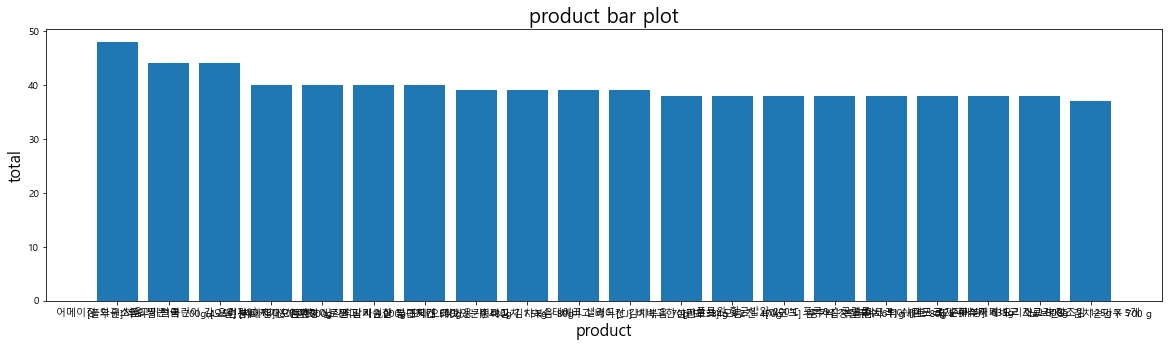

In [19]:
plt.figure(figsize=(20,5))
plt.bar(name, total)
plt.title('product bar plot', fontsize=20)
plt.xlabel('product', fontsize=16)
plt.ylabel('total', fontsize=16)
plt.xticks(name, fontproperties=font_name)
plt.show()

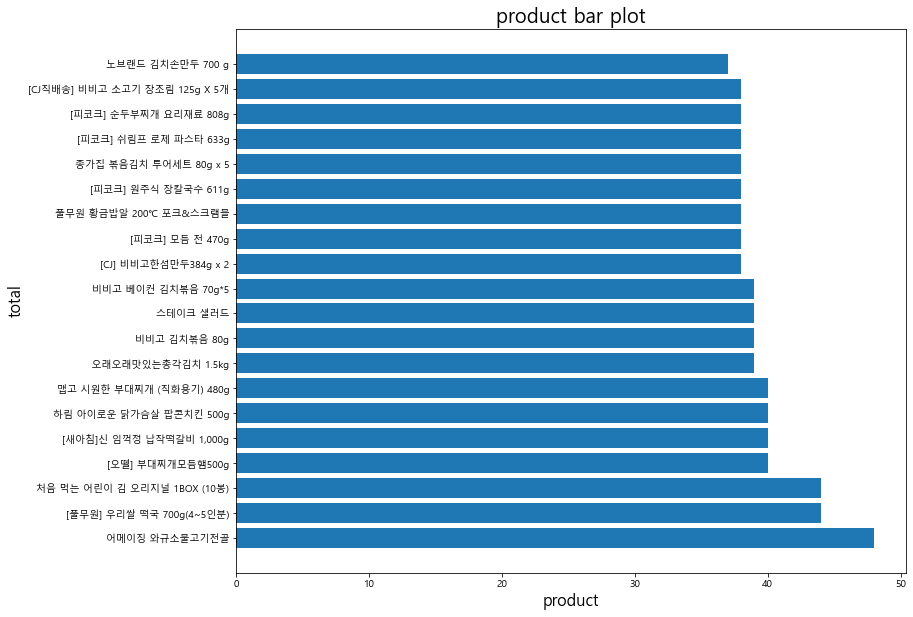

In [20]:
plt.figure(figsize=(12,10))
plt.barh(name, total)
plt.title('product bar plot', fontsize=20)
plt.xlabel('product', fontsize=16)
plt.ylabel('total', fontsize=16)
plt.yticks(name, fontproperties=font_name)
plt.show()

# Credit Cards Analysis

In [30]:
import  pymysql
db= pymysql.connect(host='localhost', user='root', password='root', db='mall')
curs =db.cursor(pymysql.cursors.DictCursor)
query = "select sum(orders.total_price), credit_cards.type, count(*)" +\
" from orders, credit_cards" +\
" WHERE orders.credit_cards_seq = credit_cards.seq" +\
" GROUP BY credit_cards.type" +\
" ORDER BY sum(orders.total_price) desc;"
curs.execute(query)
rows= curs.fetchall()
for row in rows:
    print(row['sum(orders.total_price)'],row['type'], row['count(*)'])
db.close

126602468 신세계SC카드 717
10914357 제주카드 111
10127700 수협카드 109
9795343 삼성카드 102
9243003 이마트SC카드 84
9184838 이마트우리체크카드 91
9176717 전북카드 111
8976279 우리카드 76
8949647 이마트신한카드 96
8943052 신한카드 94
8824387 비씨카드 88
8581581 현대카드 86
8401213 롯데카드 84
8046937 트레이더스삼성카드 98
7879226 씨티카드 82
7798490 SSGPAY카드 85
7694720 신세계신한카드 93
7454015 신세계하나체크카드 82
6793158 카카오뱅크카드 78
6779913 신세계삼성카드 70
6446090 이마트삼성카드 75
6438801 신세계씨티카드 78
6158473 SC은행카드 66
6103442 광주카드 60
6082470 NH카드 69
5955127 이마트KB국민카드 67
5556019 이마트e현대카드 65
5324393 KB국민카드 63
4683032 IBK기업은행카드 56
4658950 SSG.COM카드 46
4267298 하나카드 54


<bound method Connection.close of <pymysql.connections.Connection object at 0x000002780BCCEC70>>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

<ipython-input-58-9cbfe6008737>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df.index, fontsize=20, fontproperties=fontprop, rotation=45)


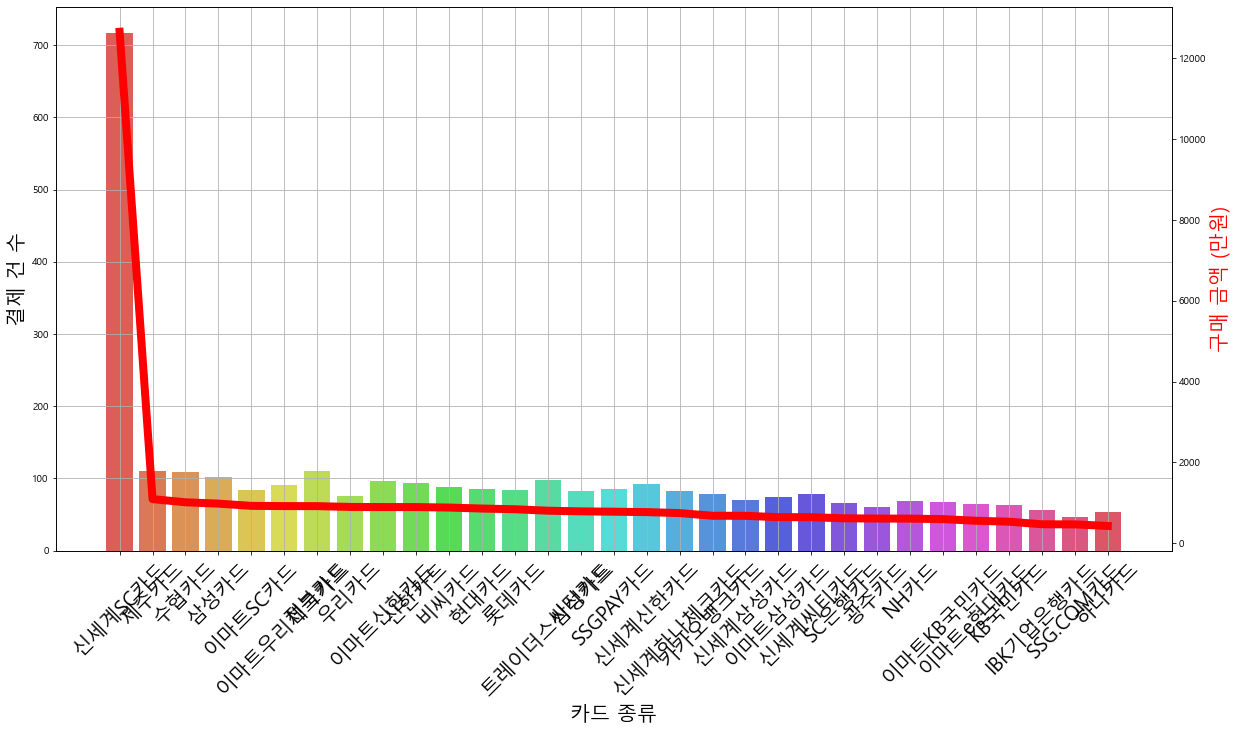

In [58]:
path = "C:/Windows/Fonts/malgun.ttf"
fontprop = fm.FontProperties(fname=path, size=16)
df =pd.DataFrame(rows)
x= df['type']
y1 = df['count(*)']
y2 = (df['sum(orders.total_price)'].astype(str).astype(int))/10000
# Graph
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams['lines.linewidth'] = 8
fig =plt.figure()

#1행 1열
ax1 =fig.add_subplot(1, 1, 1)
ax2= ax1.twinx()
#ax1에 그래프 그리기
colors= sns.color_palette('hls', len(x))
ax1.bar(x, y1, color=colors)

ax1.set_xlabel('카드 종류',fontproperties=fontprop, fontsize=20)
ax1.set_ylabel('결제 건 수',fontproperties=fontprop, fontsize=20)
ax1.grid()
#x축 좌표위의 텍스트 처리
ax1.set_xticklabels(df.index, fontsize=20, fontproperties=fontprop, rotation=45)
#ax2에 그래프 그리기
ax2.plot(x, y2, color='red')
ax2.set_ylabel("구매 금액 (만원)", color='red',fontproperties=fontprop, fontsize=20)
plt.show()